In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 235MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
directory = '/content/train',
labels='inferred',
label_mode = 'int',
batch_size=32,
image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
directory = '/content/test',
labels='inferred',
label_mode = 'int',
batch_size=32,
image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process (image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 105ms/step - loss: 1.3099 - accuracy: 0.5946 - val_loss: 0.6006 - val_accuracy: 0.6642
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5876 - accuracy: 0.6899 - val_loss: 0.5229 - val_accuracy: 0.7476
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5027 - accuracy: 0.7560 - val_loss: 0.7091 - val_accuracy: 0.6994
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4322 - accuracy: 0.7977 - val_loss: 0.4611 - val_accuracy: 0.7924
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3785 - accuracy: 0.8293 - val_loss: 0.4786 - val_accuracy: 0.7938
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3009 - accuracy: 0.8697 - val_loss: 0.4480 - val_accuracy: 0.7994
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2362 - accuracy: 0.9028 - val_loss: 0.5850 - val_ac

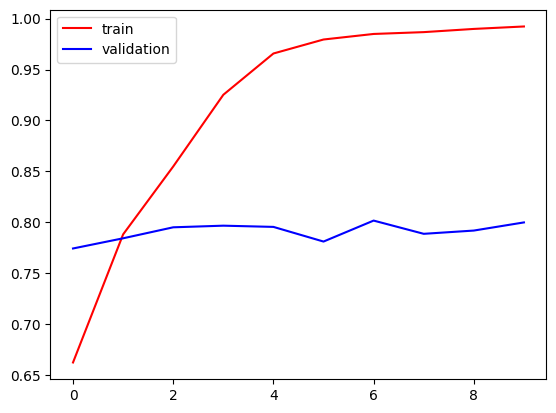

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

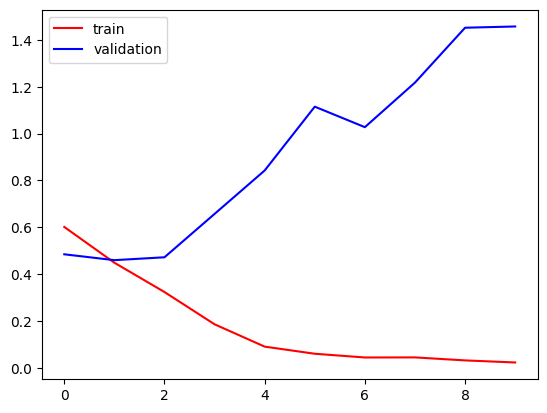

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

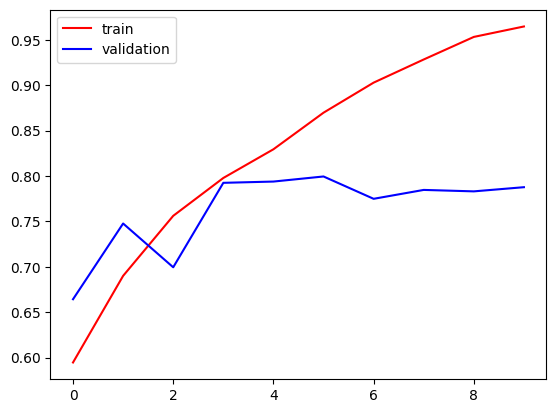

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

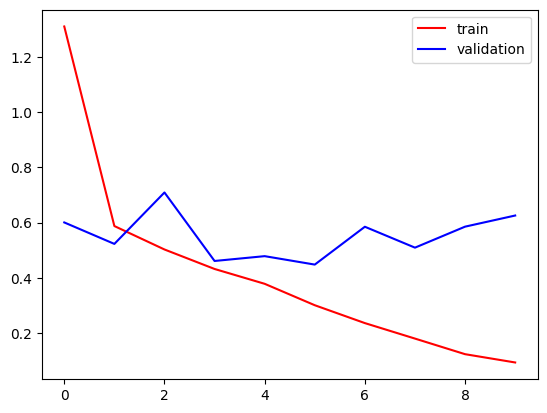

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_imgd=cv2.imread('/content/mydog.jpg')

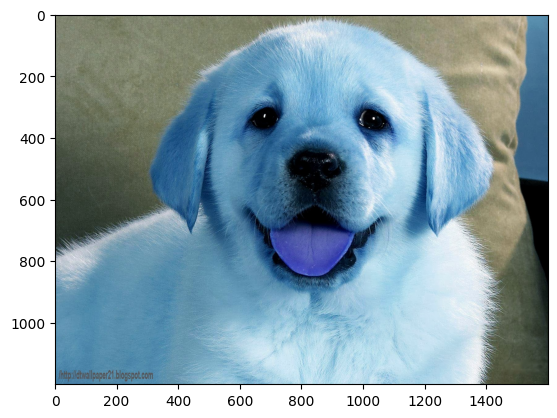

In [ ]:
plt.imshow(test_imgd)

In [ ]:
test_imgd.shape

(1200, 1600, 3)

In [ ]:
test_imgd=cv2.resize(test_imgd,(256,256))

In [ ]:
test_inputd=test_imgd.reshape((1,256,256,3))

In [ ]:
model.predict(test_inputd)

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)

In [ ]:
test_imgc=cv2.imread('/content/mycat.jpg')

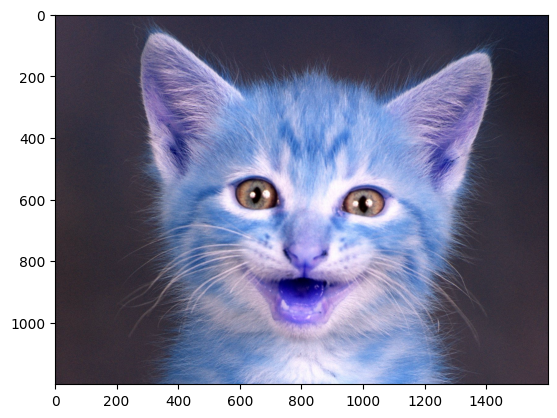

In [ ]:
plt.imshow(test_imgc)

In [ ]:
test_imgc=cv2.resize(test_imgc,(256,256))

In [ ]:
test_inputc=test_imgc.reshape((1,256,256,3))

In [ ]:
test_inputc=test_imgc.reshape((1,256,256,3))

In [ ]:
model.predict(test_inputc)

1/1 [==============================] - 0s 33ms/step


array([[0.]], dtype=float32)